# Abstract
---
### Purpose of research
1. Analyse the increase of population in New Zealand, including births, deaths, immigrants
2. Comparing the number/rate of Natural Increase and Immigrants to estimate which one is more dominant in population growth
3. Adding abortion dataset to get insight of another aspect of population

### Research Questions
* What is the trend of the rate of natural increase of New Zealand?
* Which one is the dominant contribution to New Zealand population growth, natural increase or immigrants?
* What is the trend of abortion in the 21st century and the total number of abortion, comparing with natural increase and immigrants?
* Is there any correlation between induced abortion and total population?

### Summary of findings
1. The rate of natural increase of New Zealand has constantly dropped about 30% in recent 10 years
2. In contrast, the rate of immigrants increase has fluctuated through 21st century and experienced a rapid growth in recent 10 years
3. The immigrants has become the main factor of population increase since 2014
5. So far, the total number of natural increase is roughly equal to the total number of immigrants in 21st century
4. The number of abortion has dropped considerably in recent 10 years due to the decrease of abortion among young women aged 15 to 24. 
6. However, the total number of abortion in the first 20 years of 21st century is relatively high, and equals half of the total number of natural increase or immigrants.
7. The total population is highly negatively correlated with abortion.

# Introduction

Many analysis have benn done on population growth. It is important for government to monitor the population in order to acquaire insight of demographics, evaluate the capacity of infrastructure and implement policies such as immigration policy, birth control/advocate.


New Zealand is a open country for immigration, so besides natural increase, immigrants constitute another large propotion of population growth. Undoubtblely, the immigration policy can determine the number of immigrants, and whether government should control the quota of immigrants is based on many considerations, one of them is likely to be the natural increase. Therefore, it is necessary to analyse the immigrants together with natural increase.


Moreover, abortion is another important indicator of national demographics. Sometimes, the number of abortions and the distribution of age groups among abortion women reflect not only the morality but also the economy and population composition as well. However, the analysis of abortion is usually ignored due to some reasons. 


In this notebook, we will try to analyse the relationship between three elements (natural increase, immigrants, abortions) and populaiton in New Zealand, explore their impact on population as well. 

# Methodology

# Environment Preparation

In [5]:
#header information
__author__ = 'Joshua Xu'
__version__ = "1.0.0"
__maintainer__ = "Joshua Xu"

Import libs and set the parameters of pd, and figure.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline

In [67]:
# Set Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 30)

In [68]:
# Set figure and font options in this notebook
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20

# Natural Increase Analysis

In [9]:
%pwd

'/Users/xuwen/Documents/Massey University/Master study/make sense of data'

In [10]:
#change to the correct dir
%cd ./datasets/project1/

/Users/xuwen/Documents/Massey University/Master study/make sense of data/datasets/project1


The following dataset is the data of Births, Deaths and Natural Increase in New Zealand between 2000 and 2019. The data will be used to analyse the trend of birth, death and natural increase. After integrating the total population, it is easy to calculate the rate of natural incease.

In [11]:
#load the csv file 
df_birth_death_num = pd.read_csv("./bd-dec19-births-deaths-natural-increase.csv")
df_birth_death_num.head()

,Period,Births_Deaths_or_Natural_Increase,Count
0,2000,Births,56604
1,2001,Births,55800
2,2002,Births,54021
3,2003,Births,56136
4,2004,Births,58074


In [12]:
# group the data by "Period" and different count in column 'Births_Deaths_or_Natural_Increase' 
df_bdn_newtable = df_birth_death_num.pivot_table(index='Period', columns='Births_Deaths_or_Natural_Increase')
# delete the level0 of the multiIndex of column since the level0 of index is meaningless
df_bdn_newtable.columns = pd.MultiIndex.droplevel(df_bdn_newtable.columns,level=0)
#now we get a more readable table: with index 'Period', and columns :'Births', 'Deaths', and 'Natural_Increase'
df_bdn_newtable.head()

Births_Deaths_or_Natural_Increase,Births,Deaths,Natural_Increase
Period,,,
2000,56604,26658,29943
2001,55800,27825,27972
2002,54021,28065,25956
2003,56136,28011,28125
2004,58074,28419,29655


In [13]:
#Calcaulate the highest and lowest value of three columns.
max_values = df_bdn_newtable.apply(np.max, axis=0)
min_values = df_bdn_newtable.apply(np.min, axis=0)
print(max_values, '\n')
print(min_values, '\n')
# get the data of year 2019 - the latest year
df_bdn_newtable.iloc[[-1],:]

Births_Deaths_or_Natural_Increase
Births              64341
Deaths              34260
Natural_Increase    35520
dtype: int64 

Births_Deaths_or_Natural_Increase
Births              54021
Deaths              26658
Natural_Increase    24795
dtype: int64 



Births_Deaths_or_Natural_Increase,Births,Deaths,Natural_Increase
Period,,,
2019,59637,34260,25377


In [14]:
#find the Year of maximum num of Births
df_bdn_newtable[df_bdn_newtable.Births == max_values.Births]

Births_Deaths_or_Natural_Increase,Births,Deaths,Natural_Increase
Period,,,
2008,64341,29187,35154


In [15]:
#find the Year of maximum num of Deaths
df_bdn_newtable[df_bdn_newtable.Deaths == max_values.Deaths]

Births_Deaths_or_Natural_Increase,Births,Deaths,Natural_Increase
Period,,,
2019,59637,34260,25377


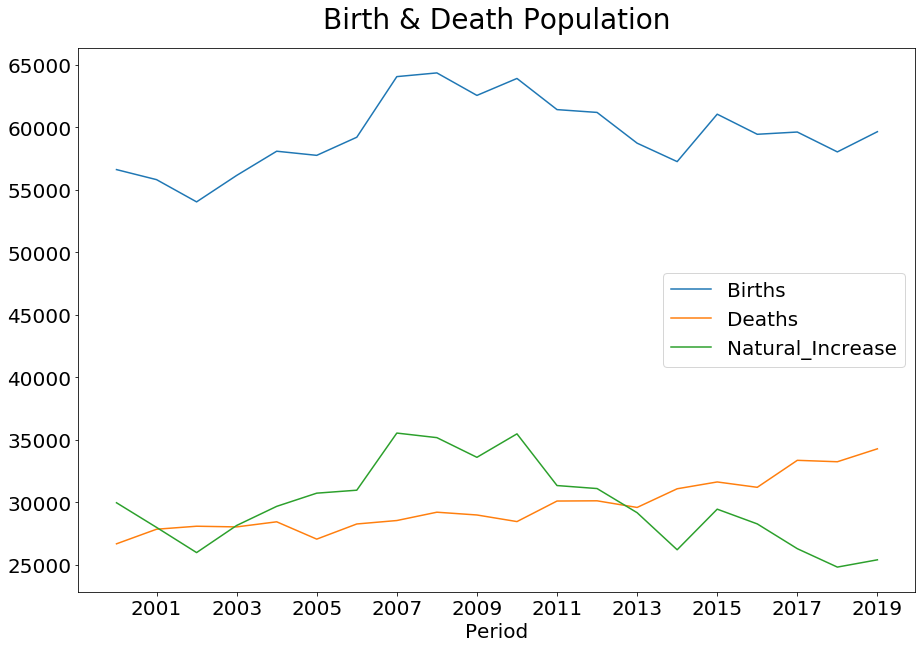

In [16]:
# Show the population of death and birth trend
#xticks use the odd numbers of years
df_bdn_newtable.plot(xticks=df_bdn_newtable.index[1::2]) 
plt.title('Birth & Death Population', fontdict={'fontsize':28}, pad=20)
plt.legend(loc='best')

## Graph explaination and analysis
As shown from the line chart, the number of Deaths started to rise consistently from 2005 while the new Births had dropped from the highest number of just above 64,000 in 2008 to below 60,000 in 2019. It seems that the **"natural population growth" (indicated by Natural_Increase) in New Zealand has dropped about 30% from 2010 and will continue to drop in the future**. 

In general, if Natural_Increase divide by total population of the same year (multiplied by a factor, usually 1,000), the result is called **the rate of natural increase (RNI)** and "this rate gives demographers an idea of how a certain country's population is growing" (Wikipedia, 2020).  The trends of RNI could be used as an indicator of economic stability. Meanwhile, government can utilise this data to estimate whether the infrastructure is affordable and employ policies related to immigration as well as other demographic policies, such as, whether encourage or discourage an increase in birth rates, etc.

# Question: what is the trend of  RNI in New Zealand?

In the above dataset, total population is missed, so we need to combine the demographic dataset of New Zealand together for computing the RNI.

### Step1: Import the dateset of population of New Zealand

Load the seasonal estimation of population in New Zealand, and since the data is seasonal estimated, the maximum of the four population in the same year will be chosen for computing.

In [17]:
# read the dataset of resident-population-of-new-zealand
df_pop_nz = pd.read_csv("./estimated-resident-population-of-new-zealand_-at-31-december-2019.csv")
df_pop_nz.head()

,As at,Estimated resident population
0,Mar-91,3488000
1,Jun-91,3495100
2,Sep-91,3504600
3,Dec-91,3516000
4,Mar-92,3526500


In [18]:
# change the names of columns to be more readable
df_pop_nz.columns = ['Date', 'Population']
df_pop_nz.head()

,Date,Population
0,Mar-91,3488000
1,Jun-91,3495100
2,Sep-91,3504600
3,Dec-91,3516000
4,Mar-92,3526500


### Step 2: 'population' dataset manipulation: format converting and data cleaning

In [19]:
'''
normalize the Date format:
1. use regex to delete the unwanted part of the str
2. convert the Date formate to 'int' --notice that the date format is 'str' after 'replace' operation via regex
'''
df_pop_nz.Date = df_pop_nz.Date.replace(r'\D{4}', '', regex=True)
df_pop_nz.Date = df_pop_nz.Date.astype('int')
#convert the Date to the same as "df_bdn_newtable", make sure excute more than once will not change the date
df_pop_nz.Date = df_pop_nz.Date.apply(lambda x : x + 1900 if x > 90 and x < 100 else x + 2000 if x < 90 else x)
df_pop_nz.head()

,Date,Population
0,1991,3488000
1,1991,3495100
2,1991,3504600
3,1991,3516000
4,1992,3526500


In [20]:
#choose the maximum of the population of the year and set 'date' as index
df_totalpop_nz = df_pop_nz.pivot_table(index=['Date'], aggfunc=np.max)
df_totalpop_nz.tail()

,Population
Date,
2015,4633700
2016,4725300
2017,4805400
2018,4881300
2019,4951500


### Step 3:  Merge two datasets together 

Combine the two table together to generage RNI. Notice that here the operation is "inner merge" because the "population" dataset have much earlier data that the other dataset can't match. The extra data is dropped in this case.

In [21]:
#merge two datasets with index (year)
df_rni_table = pd.merge(df_bdn_newtable, df_totalpop_nz, left_index=True, right_index=True)
#give a readable index name 
df_rni_table.index.name = 'Year'
#generate the new 'RNI' column
df_rni_table['RNI'] = df_rni_table['Natural_Increase'] / df_rni_table['Population']  * 1000
df_rni_table.head()

,Births,Deaths,Natural_Increase,Population,RNI
Year,,,,,
2000,56604,26658,29943,3873100,7.731016
2001,55800,27825,27972,3916200,7.142638
2002,54021,28065,25956,3989500,6.506078
2003,56136,28011,28125,4061600,6.924611
2004,58074,28419,29655,4114300,7.207787


### Step 4: RNI visulisation and data analysis

Text(0.5, 1.0, 'Rate of Natural Increase ')

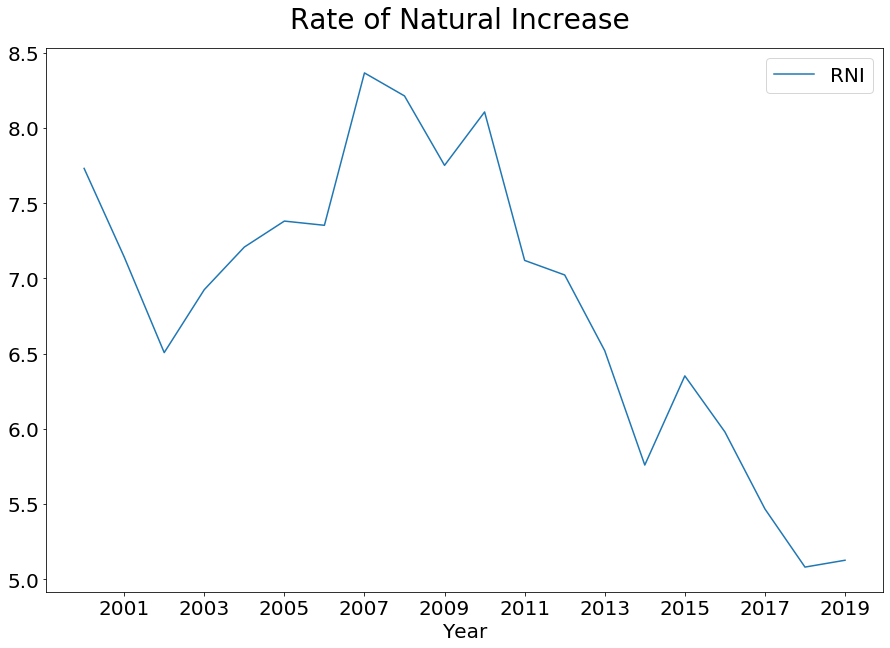

In [22]:
#xticks will use the odd numbers of years
df_rni_table.plot(y='RNI', xticks=df_rni_table.index[1::2])
plt.title('Rate of Natural Increase ', fontdict={'fontsize':28}, pad=20)

## Graph explaination and analysis
The graph illustrates the RNI trend and it is clear that **the RNI has decreased more than 30% from 2007 to 2019**. Notice that the poputation is the total number, including immigrants.

# Question: Which one is the dominant contribution to New Zealand population growth, natural increase or immigrants?

# Immigrents data Analysis

Next, let's see how immigration affects the New Zealand population.

### Step 1: import dataset of migration (both direction)
the dataset is monthly statistics, and has both "Arrivals" and "Departures" direction, the two columns represent immigrants and emigrants respectively while the "Net" calculate the residuals.

In [23]:
df_im = pd.read_csv('./Estimated migration by direction.csv', header=1,skiprows=[2])
print(df_im.head()) # index need to convert to date format
df_im.tail() # data need to clean

  Unnamed: 0  Arrivals  Departures     Net
0    2001M01    8250.0      8800.0  -550.0
1    2001M02    9350.0      9630.0  -280.0
2    2001M03    8720.0      7490.0  1220.0
3    2001M04    9280.0      7190.0  2090.0
4    2001M05    9110.0      7960.0  1160.0


,Unnamed: 0,Arrivals,Departures,Net
255,Telephone: 0508 525 525,NaN,NaN,NaN
256,Email:info@stats.govt.nz,NaN,NaN,NaN
257,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN


### Step 2: drop the NaN rows and regulate index ('Year')

In [24]:
df_im = df_im.dropna()
df_im.iloc[:,0] = df_im.iloc[:,0].replace('M.*', '', regex=True)
df_im = df_im.rename(columns = {'Unnamed: 0': 'Year'})
df_im = df_im.pivot_table(index=['Year'], aggfunc=np.sum)
# the index.dtype MUST be the same (inr), otherwise the merge/join operation will fail
df_im.index = df_im.index.astype('int') 

In [25]:
print(df_rni_table.index)
print(df_im.index)
df_im.tail()

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')
Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')


,Arrivals,Departures,Net
Year,,,
2015,142320.0,83180.0,59140.0
2016,145500.0,83240.0,62260.0
2017,143120.0,90540.0,52580.0
2018,140480.0,91160.0,49330.0
2019,139760.0,95480.0,44280.0


### Step 3: Join two datasets together, compare and visualize

1）Compare **the rate of nature increase (RNI)** and **rate of immigrants increase (RII)**.
Notice that for RII, we use number per 1000 people as the unit, the same as RNI.

2）Compare the accumulation of the population of Natural Increase and Immigrants (the value of "Net") .

In [26]:
#join the two datasets together, drop the rows either dataset do not have
df_pop_include_im = df_rni_table.join(df_im.Net, how='inner')
# change the column 'Net' to a more readable name in new table
df_pop_include_im = df_pop_include_im.rename(columns = {'Net':'Immigrants'})

In [27]:
df_pop_include_im['RII'] = df_pop_include_im['Immigrants'] / df_pop_include_im['Population'] * 1000
df_pop_include_im.tail()

,Births,Deaths,Natural_Increase,Population,RNI,Immigrants,RII
Year,,,,,,,
2015,61038,31608,29430,4633700,6.351296,59140.0,12.763019
2016,59430,31179,28251,4725300,5.978668,62260.0,13.175883
2017,59610,33339,26268,4805400,5.466350,52580.0,10.941857
2018,58020,33225,24795,4881300,5.079589,49330.0,10.105914
2019,59637,34260,25377,4951500,5.125114,44280.0,8.942745


Text(0.5, 1.0, 'Population Growth Rate')

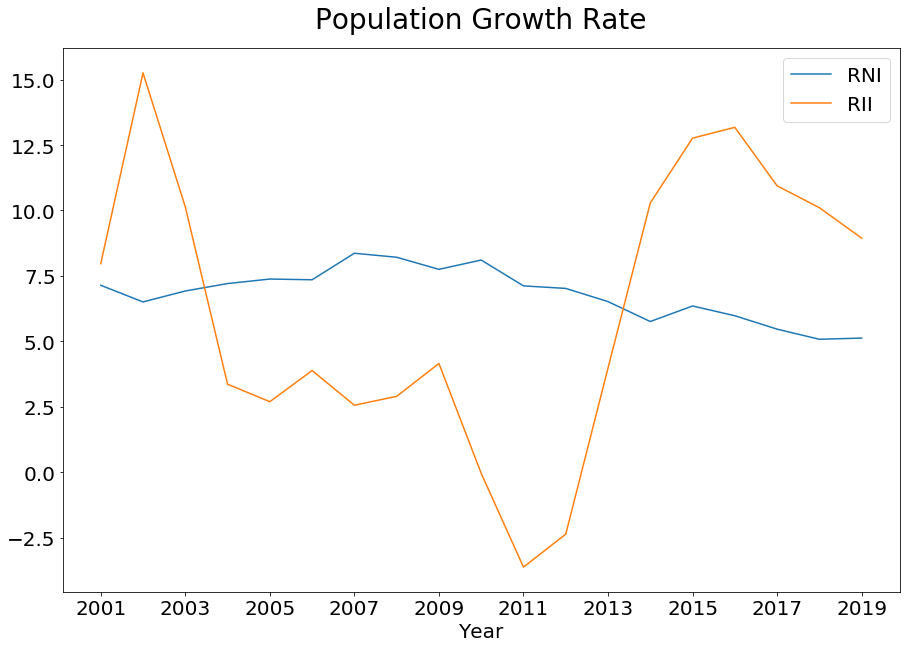

In [28]:
df_pop_include_im.plot(y=['RNI', 'RII'], xticks=df_pop_include_im.index[::2])
plt.title('Population Growth Rate', fontdict={'fontsize':28}, pad=20)

comparing the per year accumulated number of Natural Increase with Immigrants  could give a clear overview of the impacts of two factors on population. 

([<matplotlib.axis.XTick at 0x107ebf090>,
 <a list of 10 Text xticklabel objects>)

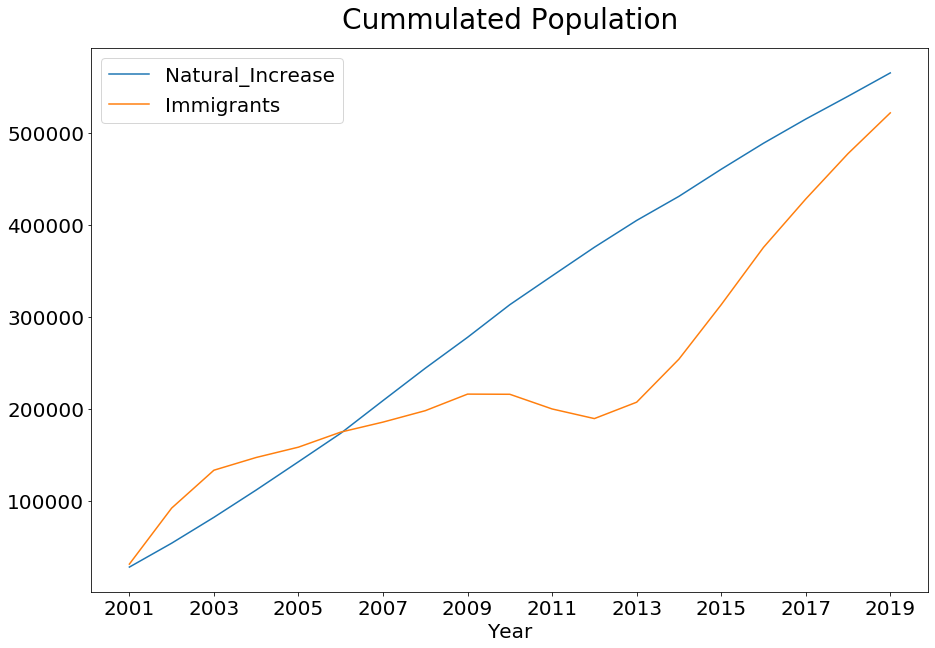

In [29]:
#calculate the cummulated population of two different source
df_pop_include_im['Natural_Increase'].cumsum().plot(legend=True)
df_pop_include_im['Immigrants'].cumsum().plot(legend=True)
plt.title("Cummulated Population", fontdict={'fontsize':28}, pad=20)
#xticks will use the odd numbers of years
plt.xticks(ticks=df_pop_include_im.index[::2])

## Graph explaination and analysis

From the two above graphs, It is clear that: 

* RNI is relatively stable with a slight drop in 21th centry as mentioned before. 

* On the other hand, the number of immigrants fluctuates dramatically from year to year: the number in 2010 to 2012 is even negative while in rencent years the number of immigrants of each year are nearly double of Natrual Increase.

* However, the immigrants surged in recent years and till the end of 2019, the total cumulated number of immigrants in 21st centry is roughly equivalent to the total number of Natural Increase in New Zealand and it is likely to exceed the Natural Increase in the near future. 

* **Immigrants is the main contribution to the increase of New Zealand population in recent 5 years and will continue to play a key role in the future**.

# What is the trend of abortion in the 21st century and the total number of abortion, comparing with natural increase and immigrants?

## Abortion Data analysis
Abortion is often ignored when analysing the demographics, but it is a big issue of the society and it has significant impact on Population. In this notebook, abortion data will be explored, visualized and compared with the above datasets. 

The dataset loaded in this section is the abortion statistics grouped by ages of women. 

In [30]:
df_abortion = pd.read_csv('./abortion-statistics-year-ended-december-2018-abortions-by-age-of-woman-csv.csv')
df_abortion.head()

,Period,Age_of_woman,Induced_abortions
0,2000,11-14,74
1,2000,15-19,3107
2,2000,20-24,4548
3,2000,25-29,3399
4,2000,30-34,2496


Text(0.5, 1.0, 'Induce Abortions')

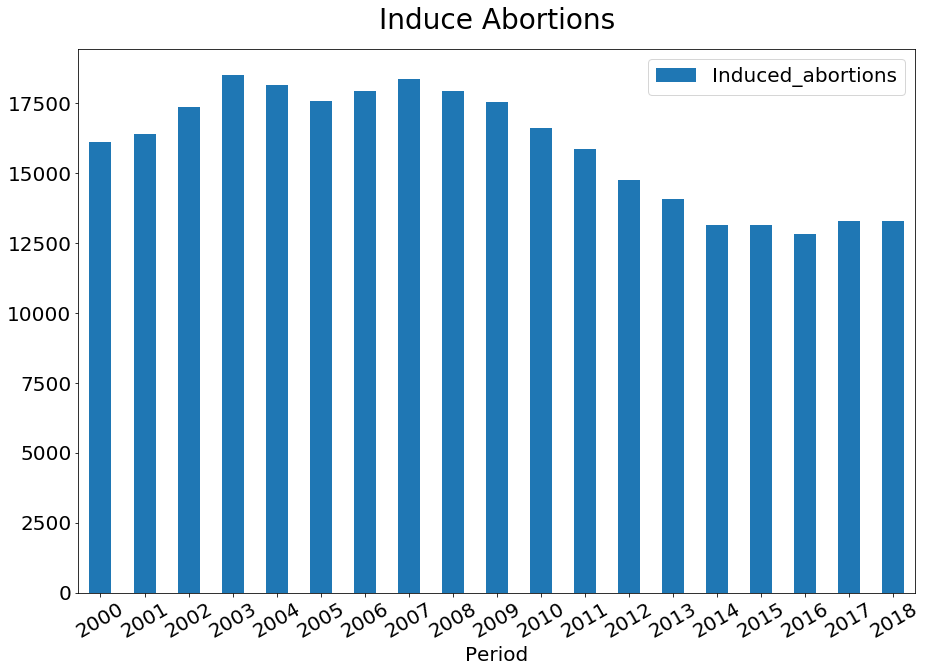

In [31]:
#show the total number of abortion each year
df_abortion.groupby(by=['Period']).sum().plot(kind='bar', rot=30)
plt.title('Induce Abortions', fontdict={'fontsize':28}, pad=20)

Text(0.5, 1.0, 'Induce Abortions In Age Group')

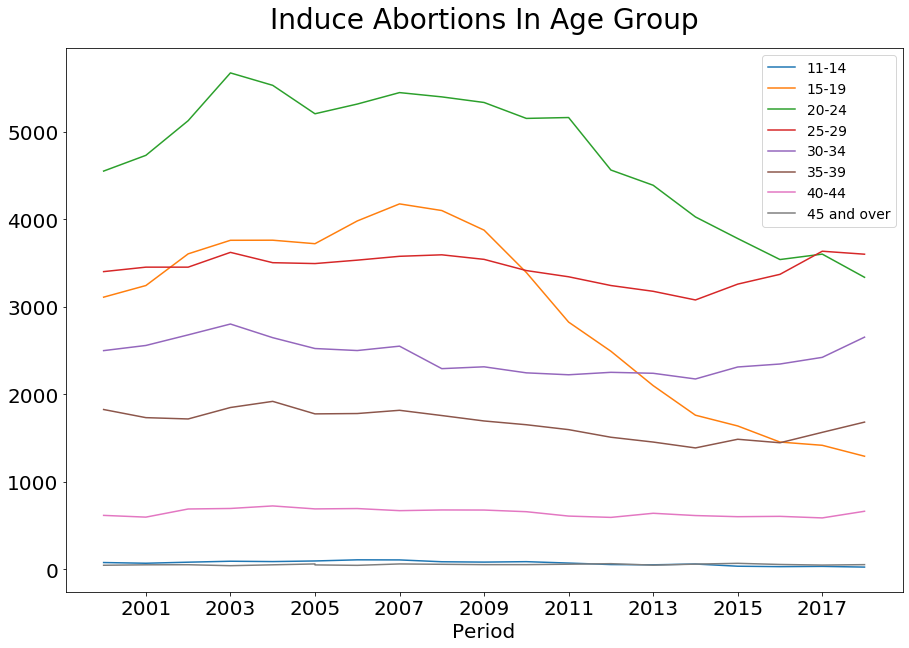

In [32]:
#plot all the 8 categories (categosied by 'age of woman') in one graph
fig, ax = plt.subplots()
for label, df in df_abortion.groupby(['Age_of_woman']):
    df.plot(x='Period', y='Induced_abortions', ax=ax, label=label.strip())
    plt.xticks(ticks=df['Period'][1::2])
plt.legend(fontsize='x-small')
plt.title('Induce Abortions In Age Group', fontdict={'fontsize':28}, pad=20)

Text(0.5, 1, 'Induce Abortions Scatter')

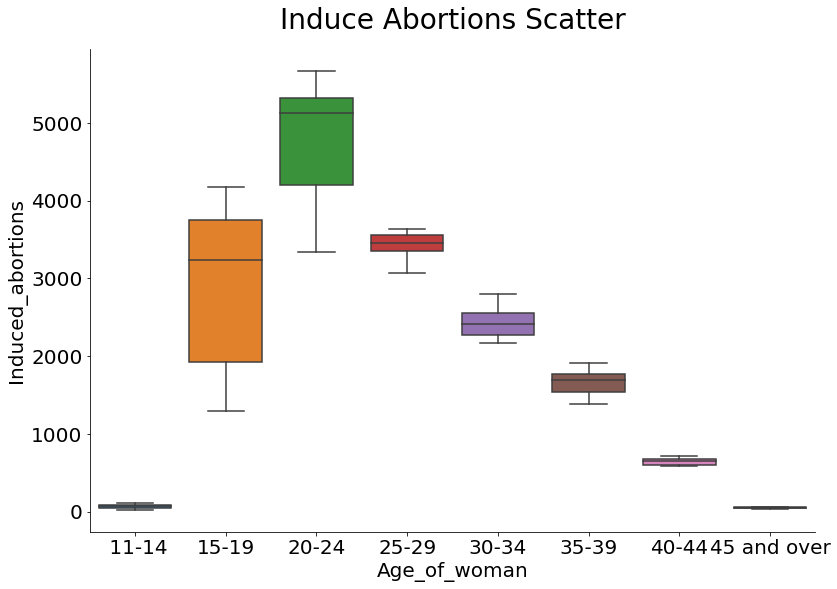

In [97]:
#show the distribution and the extent of fluctuation of the data in certain age group
sns.catplot(x='Age_of_woman', y='Induced_abortions', ci=100, data=df_abortion, kind='box', height=8, aspect=12/8)
plt.title('Induce Abortions Scatter', fontdict={'fontsize':28}, pad=20)

When comapring the abortions with natural increase and immigrants, the accummulation of number could be intuitive to show the summary and trend simultaneously. 

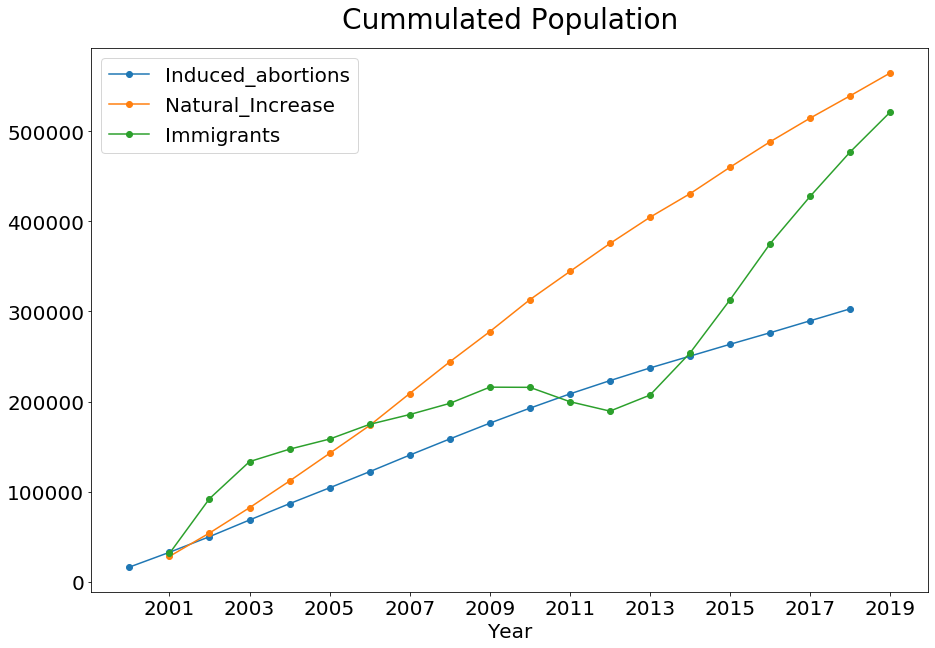

In [35]:
df_abortion.groupby(by=['Period']).sum().cumsum().plot(legend=True, marker='o')
df_pop_include_im['Natural_Increase'].cumsum().plot(legend=True, marker='o')
df_pop_include_im['Immigrants'].cumsum().plot(legend=True, marker='o')
plt.xticks(ticks=df_pop_include_im.index[::2])
plt.title(label="Cummulated Population", fontdict={'fontsize':28}, pad=20)
plt.legend(loc='best')

In [36]:
print("total immigrants in 20 years:", df_pop_include_im.Immigrants.sum())
print("total Natural_Increas in 20 years:", df_pop_include_im.Natural_Increase.sum())
print("total abortions in 20 years:", df_abortion.Induced_abortions.sum())

total immigrants in 20 years: 521500.0
total Natural_Increas in 20 years: 564927
total abortions in 20 years: 302945


## Graph explaination and analysis

From the graph of "Induce abortions trend", it seems that up to 2018, **the number of Induced abortions had dropped 25% since 2007**. This is a positive trend as **the abortions among younger women aged 15-24 had dropped significantly (nearly 50% from the peak)**.

However, the total number of Induce abortions is still high and **the total number in the first 20 years of the 21st century is more than half of the Natural Increase or Immigrants**. This moral issue may continue to be controversial as the number is likely maintain at high level. 

# Question: Is there any correlation between induced abortion and total population?

# Correlation and Prediction

In this section, we will try to do some correlation analysis and prediction based on the existing datasets.

In [37]:
#join the two datasets together to generate a new table with all the neccessary columns
df_pop_ab = df_pop_include_im.join(df_abortion.groupby(by=['Period']).sum(), how='inner')
df_pop_ab.index.name = 'Year'
df_pop_ab.head()

,Births,Deaths,Natural_Increase,Population,RNI,Immigrants,RII,Induced_abortions
Year,,,,,,,,
2001,55800,27825,27972,3916200,7.142638,31210.0,7.969460,16410
2002,54021,28065,25956,3989500,6.506078,60860.0,15.255044,17380
2003,56136,28011,28125,4061600,6.924611,41170.0,10.136399,18511
2004,58074,28419,29655,4114300,7.207787,13830.0,3.361447,18153
2005,57744,27033,30711,4161000,7.380678,11220.0,2.696467,17589


### Correlation Analysis

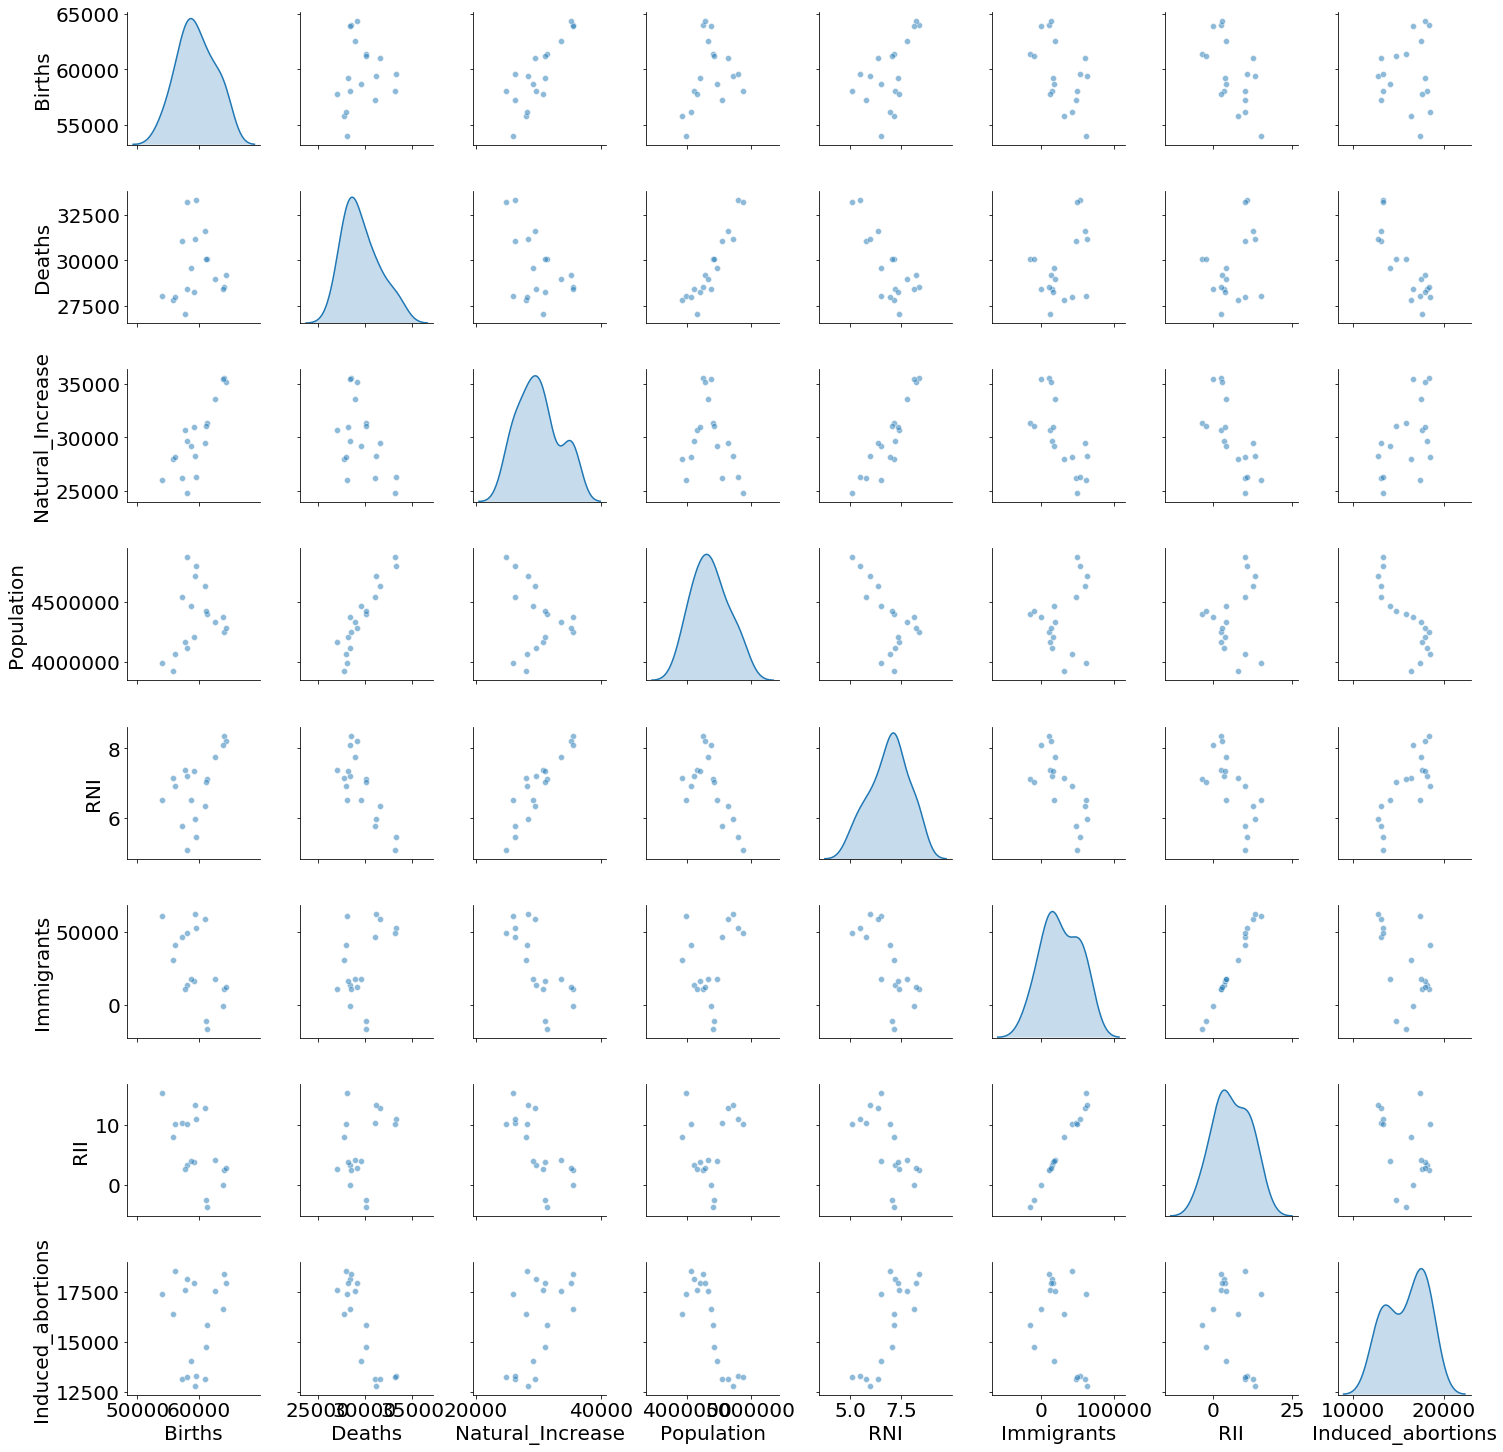

In [58]:
sns.pairplot(df_pop_ab, diag_kind='kde', plot_kws={'alpha': 0.5})

In [39]:
df_pop_ab.corr()

,Births,Deaths,Natural_Increase,Population,RNI,Immigrants,RII,Induced_abortions
Births,1.000000,0.102520,0.835744,0.275386,0.550431,-0.526348,-0.579487,0.083230
Deaths,0.102520,1.000000,-0.460545,0.928089,-0.760478,0.436796,0.345152,-0.849580
Natural_Increase,0.835744,-0.460545,1.000000,-0.266573,0.910966,-0.710707,-0.707536,0.543315
Population,0.275386,0.928089,-0.266573,1.000000,-0.638600,0.306301,0.199573,-0.839303
RNI,0.550431,-0.760478,0.910966,-0.638600,1.000000,-0.694974,-0.647624,0.800011
Immigrants,-0.526348,0.436796,-0.710707,0.306301,-0.694974,1.000000,0.993240,-0.454525
RII,-0.579487,0.345152,-0.707536,0.199573,-0.647624,0.993240,1.000000,-0.375398
Induced_abortions,0.083230,-0.849580,0.543315,-0.839303,0.800011,-0.454525,-0.375398,1.000000


## Data anaylysis and explanation

It is interesting to note that Deaths and Population has strongly positive correlation, which is against intuition. On the other hand, the Induced_abortions and Population is strongly negatively correlated, which means if the number of induced abortions decrease, then the population will increase. 

if we try to **use induced abortions to predict the population**, then we can generate a regression model and visualise the trend.

/Users/xuwen/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     38.13
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           1.33e-05
Time:                        17:35:09   Log-Likelihood:                -239.58
No. Observations:                  18   AIC:                             483.2
Df Residuals:                      16   BIC:                             484.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.091e+06   2.82e+05     21.607      0.000    5.49e+06    6.69e+06
Induced_abortions  -108.3292     17.543     -6.175      0.000    -145.518     -71.140
==============================================================================
Omnibus:                        5.771   Durbin-Watson:                   0.354
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                3.218
Skew:                          -0.925   Prob(JB):                        0.200
Kurtosis:                       3.931   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

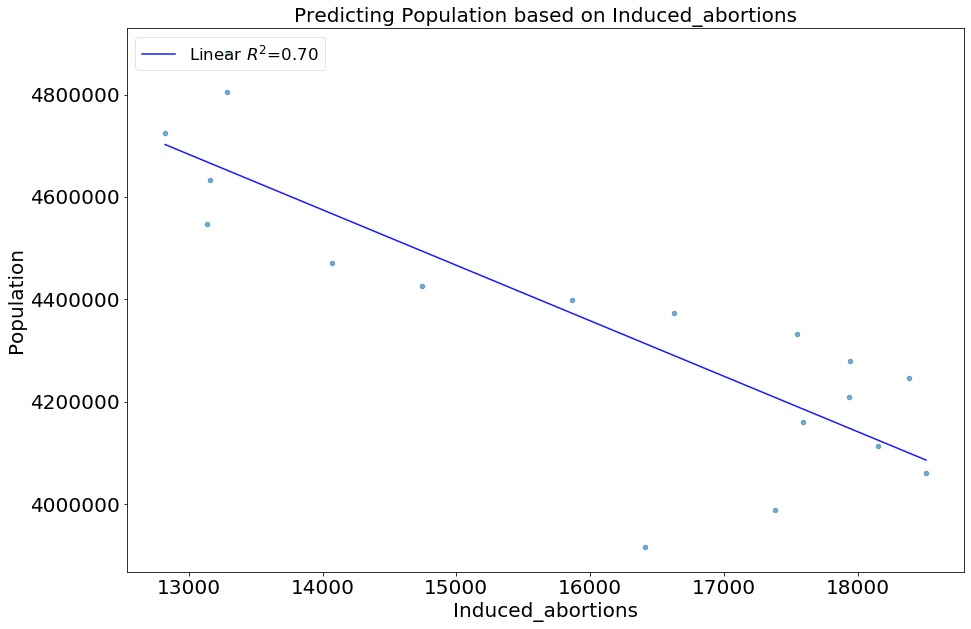

In [40]:
import statsmodels.formula.api as smf
#generate the x-axis values with Induced_abortions values
x = pd.DataFrame({'Induced_abortions': np.linspace(df_pop_ab.Induced_abortions.min(), df_pop_ab.Induced_abortions.max(), len(df_pop_ab.Induced_abortions))})
#print(x)
#generate the model which uses the Induced_aborthions  to predict the Population - the ols() return the generated model
mod = smf.ols(formula='Population ~ 1 + Induced_abortions', data=df_pop_ab).fit()

#plot the actual data
plt.scatter(df_pop_ab.Induced_abortions, df_pop_ab.Population, s=20, alpha=0.6)
plt.xlabel('Induced_abortions'); plt.ylabel('Population')

#render the regression line by predicting the ys using the generated model from above
plt.plot(x.Induced_abortions, mod.predict(x), 'b-', label='Linear $R^2$=%.2f' % mod.rsquared, alpha=0.9)

#give the figure a meaningful legend
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("Predicting Population based on Induced_abortions", fontsize=20)

#display the model statistics describing the goodness of fit
mod.summary()

## Graph explaination and analysis

It seems that the linear regression can help to well explain the relationship between induced abortions and population, then the conclusion would be that if government wants to incease its population, a recommended solution should be advocates anti-abortion. Of course, the reason behind the correlation needs further investigation and evaluation in the future.

# Result & Discussion
 
There are some findings from the data analysis:
1. The rate of natural increase of New Zealand has constantly dropped about 30% in recent 10 years
2. In contrast to the natural increase, the rate of immigrants increase has fluctuated through 21st century and experienced a rapid growth in recent 10 years
3. The immigrants has become the main factor of population increase since 2014
5. So far, the total number of natural increase is roughly equal to the total number of immigrants in 21st century
4. The number of abortion has dropped considerably in recent 10 years due to the decrease of abortion among young women aged 15 to 24. 
6. However, the total number of abortion in the first 20 years of 21st century is relatively high, and equals half of the total number of natural increase or immigrants.
7. The total population is highly negatively correlated with abortion.

# Recommendation

From the above analysis, some recommendation could be drawn based on the findings:
1. As natural increase in New Zealand constantly drops, it is suggest to loose the immigration policies to attract talent immigrants thus keep the balance of population. This could help to prevent ecominic recession since decent population is the foundation of the development of national economy.


2. The number of induced abortion has strong negative correlation with total population, therefore, it is highly recommended to advocate anti-abortion in terms of population increase.